# importing library

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading The Dataset

In [66]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Dropping Unnamed Column

In [67]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [68]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
df.shape

(53940, 10)

# Dataset Information

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
NCut = pd.get_dummies(df['cut'],drop_first=True)
NColor = pd.get_dummies(df['color'],drop_first=True)
NClarity = pd.get_dummies(df['clarity'],drop_first=True)

In [72]:
df = pd.concat([df,NCut,NColor,NClarity],axis=1)

In [73]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [74]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Good', 'Ideal', 'Premium', 'Very Good', 'E', 'F', 'G', 'H', 'I',
       'J', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

#Dropping Cut color Clarity Features

In [75]:
df.drop(['cut','color','clarity'],axis=1,inplace=True)

In [76]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Histogram Plot For Better Visualisation

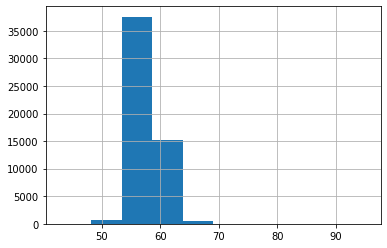

In [77]:
df['table'].hist()

# Correlation

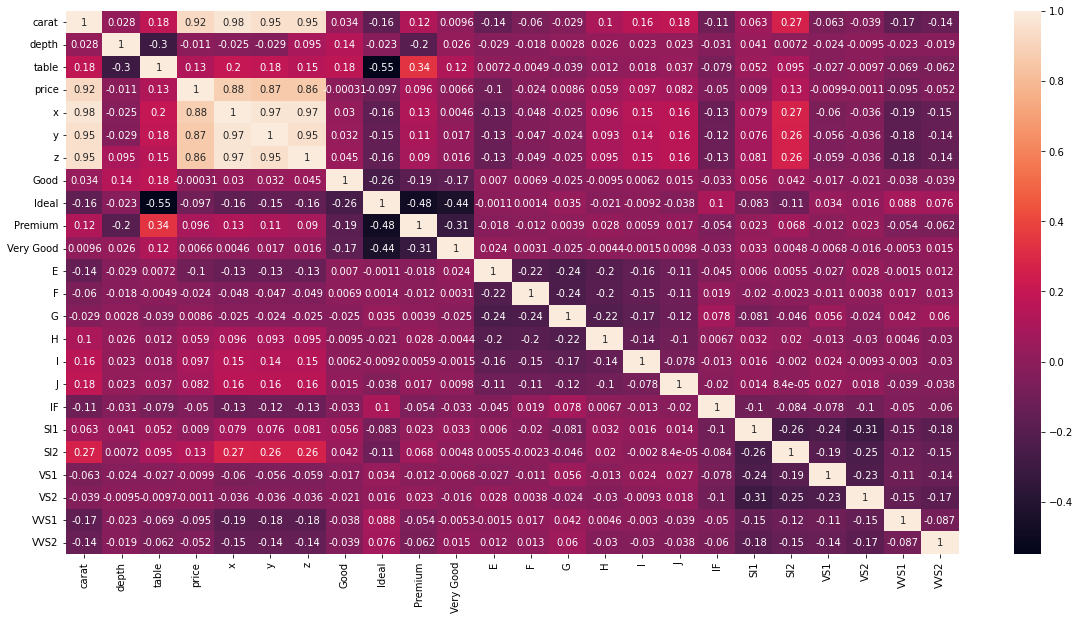

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Splitting the data

In [79]:
X = df.drop('price',axis=1)
y = df['price']

# Splitting The Dataset

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Creating Linear Regression Model

In [82]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
LR = LinearRegression()

In [83]:
LR.fit(X_train,y_train)

LinearRegression()

#Linear Regression Score

In [84]:
print(LR.score(X_test,y_test))

0.9182394493400712


# Predicting Values Based On Trained Model

In [85]:
y_predLR = LR.predict(X_test)

#Metrics For Model Accuracy

In [86]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predLR))
print('MSE:', metrics.mean_squared_error(y_test, y_predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predLR)))

MAE: 747.2162921524914
MSE: 1336305.194823224
RMSE: 1155.986675884815


# Predicted Value VS Actual Value

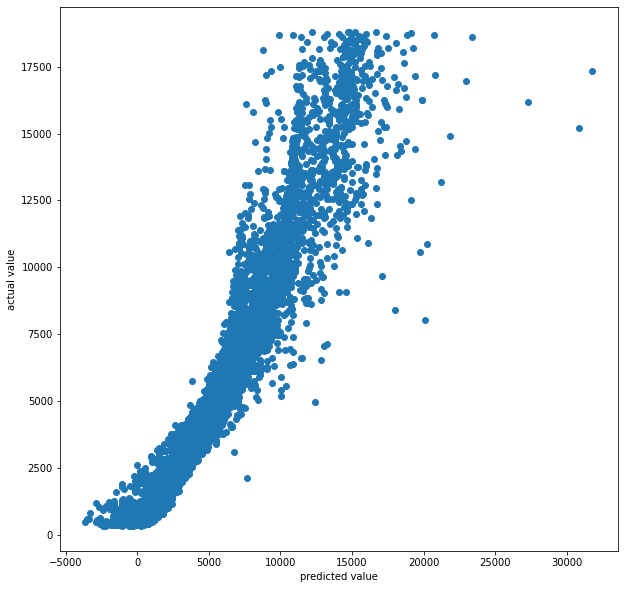

In [87]:
plt.figure(figsize=(10,10))
plt.plot(y_predLR,y_test,'o')
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

# Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor
  #                              no. of trees=10
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [89]:
print(regressor.score(X_test,y_test))

0.9734575981373736


# Predicting Values Based on Model Created

In [90]:
y_pred = regressor.predict(X_test)

# Metrics to Measure Model Performance

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 310.1164626039515
MSE: 433812.5074480037
RMSE: 658.6444469119918


# Predicted Value VS Actual Value

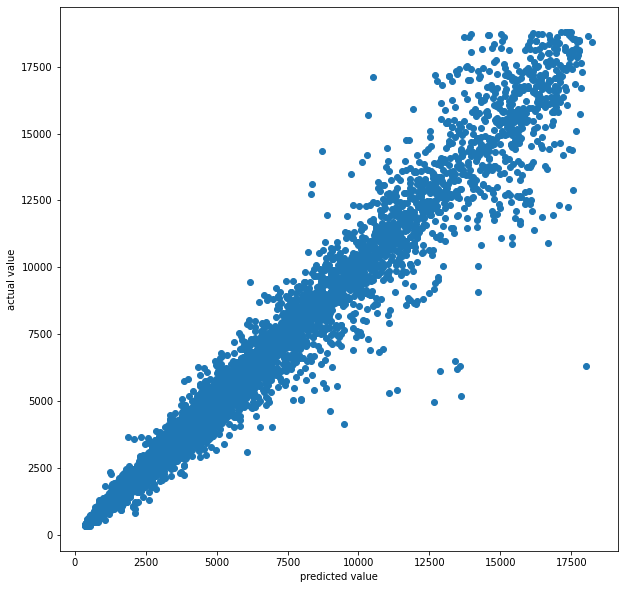

In [92]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,'o')
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

# Pickling Of Model

In [93]:
import pickle
  
def storeData():
      
    # Its important to use binary mode
    sdbfile1 = open('Random_Forest_Refression.pkl', 'ab')
    sdbfile2 = open('Linear_Regression.pkl', 'ab')
      
    # source, destination
    pickle.dump(regressor, sdbfile1)
    pickle.dump(LR, sdbfile2)  
    sdbfile1.close()
    sdbfile2.close()
    
  
if __name__ == '__main__':
    storeData()